In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [4]:
import numpy as np
import cv2 as cv
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
dirname = os.path.join(os.getcwd(),'flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\LENOVO\IA\Flores\flores\
C:\Users\LENOVO\IA\Flores\flores\c_cristo 1
C:\Users\LENOVO\IA\Flores\flores\floripondio 4306
C:\Users\LENOVO\IA\Flores\flores\f_margarita 4780
C:\Users\LENOVO\IA\Flores\flores\girasol 5337
C:\Users\LENOVO\IA\Flores\flores\rosa 5645
Directorios leidos: 5
Imagenes en cada directorio [4307, 4780, 5337, 5645, 4352]
suma Total de imagenes en subdirs: 24421


In [6]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  24421


In [7]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 c_cristo
1 floripondio
2 f_margarita
3 girasol
4 rosa


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (19536, 28, 28, 3) (19536,)
Testing data shape :  (4885, 28, 28, 3) (4885,)


Text(0.5, 1.0, 'test : 3')

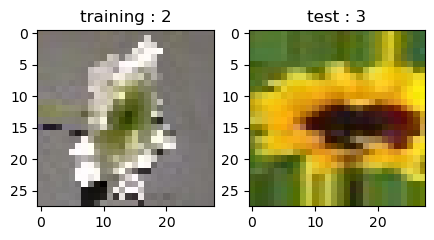

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("training : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("test : {}".format(test_Y[0]))

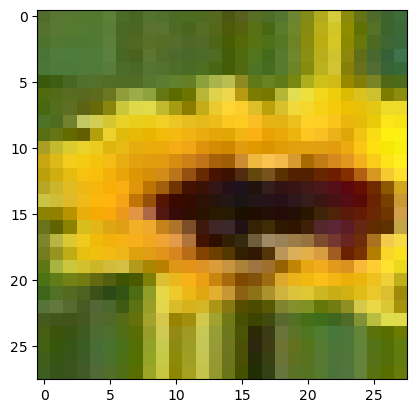

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


In [11]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(15628, 28, 28, 3) (3908, 28, 28, 3) (15628, 5) (3908, 5)


In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 43 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
flores_model = Sequential()
flores_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
flores_model.add(LeakyReLU(alpha=0.1))
flores_model.add(MaxPooling2D((2, 2),padding='same'))
flores_model.add(Dropout(0.5))

flores_model.add(Flatten())
flores_model.add(Dense(32, activation='linear'))
flores_model.add(LeakyReLU(alpha=0.1))
flores_model.add(Dropout(0.5))
flores_model.add(Dense(nClasses, activation='softmax'))

In [15]:
flores_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                200736    
                                                        

In [16]:
flores_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [17]:
flores_train = flores_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/43
245/245 [==============================] - 6s 20ms/step - loss: 1.5950 - accuracy: 0.2586 - val_loss: 1.5356 - val_accuracy: 0.4301
Epoch 2/43
245/245 [==============================] - 4s 16ms/step - loss: 1.5067 - accuracy: 0.3661 - val_loss: 1.4111 - val_accuracy: 0.4908
Epoch 3/43
245/245 [==============================] - 4s 16ms/step - loss: 1.3986 - accuracy: 0.4428 - val_loss: 1.2763 - val_accuracy: 0.5502
Epoch 4/43
245/245 [==============================] - 4s 17ms/step - loss: 1.2806 - accuracy: 0.5049 - val_loss: 1.1458 - val_accuracy: 0.6576
Epoch 5/43
245/245 [==============================] - 4s 18ms/step - loss: 1.1826 - accuracy: 0.5488 - val_loss: 1.0391 - val_accuracy: 0.6773
Epoch 6/43
245/245 [==============================] - 4s 17ms/step - loss: 1.1019 - accuracy: 0.5829 - val_loss: 0.9524 - val_accuracy: 0.7029
Epoch 7/43
245/245 [==============================] - 4s 16ms/step - loss: 1.0324 - accuracy: 0.6174 - val_loss: 0.8777 - val_accuracy: 0.7520

In [18]:
flores_model.save("flowers_model.h5py")

INFO:tensorflow:Assets written to: flowers_model.h5py\assets


INFO:tensorflow:Assets written to: flowers_model.h5py\assets


In [19]:
test_eval = flores_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

153/153 [==============================] - 1s 8ms/step - loss: 0.2453 - accuracy: 0.9265
Test loss: 0.2452710121870041
Test accuracy: 0.9265097379684448


In [20]:
flores_train.history

{'loss': [1.594957709312439,
  1.5067270994186401,
  1.3986073732376099,
  1.2805665731430054,
  1.182550311088562,
  1.101861596107483,
  1.032422661781311,
  0.9701905846595764,
  0.9183486700057983,
  0.880246639251709,
  0.8273405432701111,
  0.7860187888145447,
  0.749612033367157,
  0.7177811861038208,
  0.6916090846061707,
  0.6665288209915161,
  0.6468257904052734,
  0.6273338794708252,
  0.604462742805481,
  0.5866212248802185,
  0.565601110458374,
  0.5528767108917236,
  0.5383712649345398,
  0.5306288599967957,
  0.5173348784446716,
  0.5083591938018799,
  0.4956734776496887,
  0.4782699644565582,
  0.4738163352012634,
  0.4636061191558838,
  0.4634528160095215,
  0.442954421043396,
  0.4412064552307129,
  0.42965301871299744,
  0.42561599612236023,
  0.4215938150882721,
  0.40916508436203003,
  0.4086763560771942,
  0.4067636728286743,
  0.39435380697250366,
  0.39524897933006287,
  0.38449665904045105,
  0.37893596291542053],
 'accuracy': [0.2586383521556854,
  0.366073727

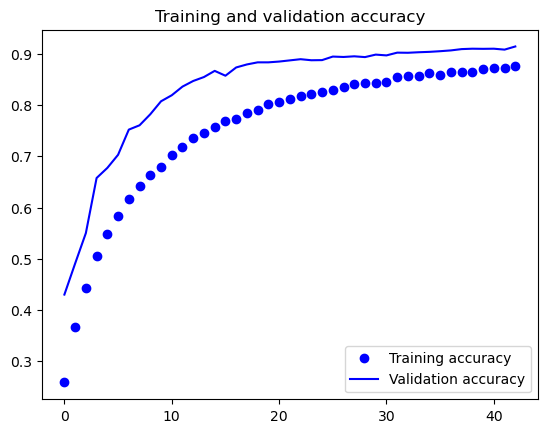

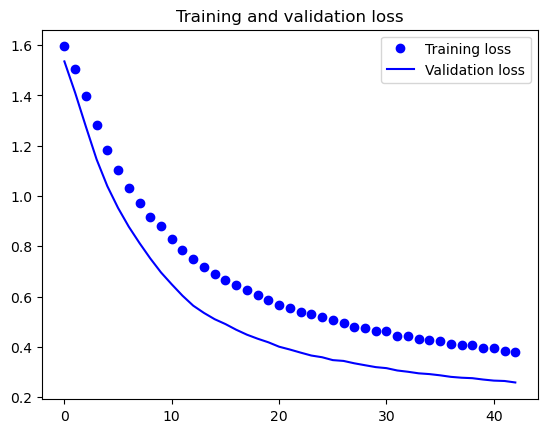

In [21]:
accuracy = flores_train.history['accuracy']
val_accuracy = flores_train.history['val_accuracy']
loss = flores_train.history['loss']
val_loss = flores_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
predicted_classes2 = flores_model.predict(test_X)

153/153 [==============================] - 2s 10ms/step


In [23]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [24]:
predicted_classes.shape, test_Y.shape

((4885,), (4885,))

Found 4526 correct labels


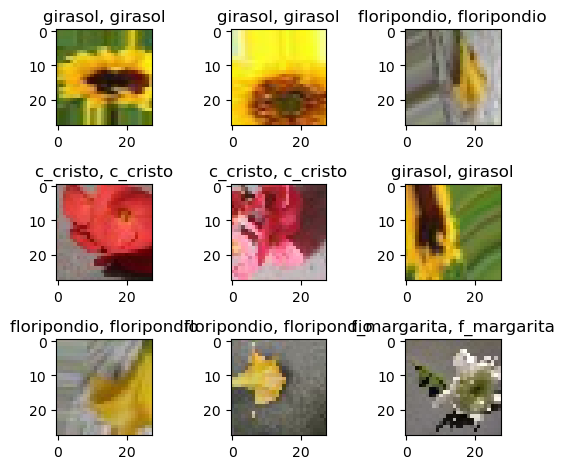

In [25]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))
    plt.tight_layout()
    if i == 1:
        normalized_image = (test_X[correct] * 255).astype(np.uint8)
        cv.imwrite('correcto'+str(i)+'.jpg', cv.cvtColor(normalized_image, cv.COLOR_RGB2BGR))

Found 359 incorrect labels


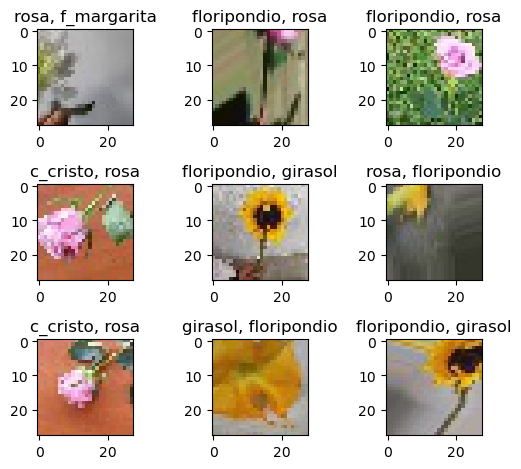

In [26]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()
    

In [27]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.97       867
     Class 1       0.90      0.82      0.85       979
     Class 2       0.94      0.99      0.97      1041
     Class 3       0.90      0.93      0.91      1094
     Class 4       0.94      0.91      0.92       904

    accuracy                           0.93      4885
   macro avg       0.93      0.93      0.93      4885
weighted avg       0.93      0.93      0.93      4885



1/1 [==============================] - 0s 33ms/step
Clase predicha: girasol
Clase predicha: 3
Probabilidades predichas: [[0.00350289 0.46419916 0.00787459 0.522668   0.00175531]]


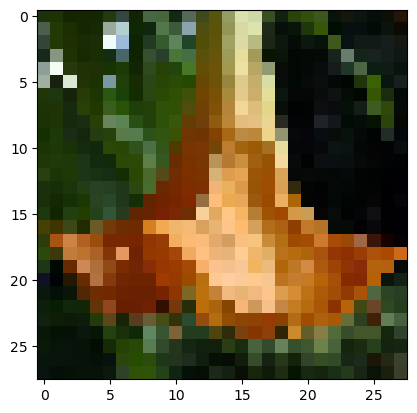

In [20]:
import cv2 as cv
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# Cargar la imagen con OpenCV
flores_model = tf.keras.models.load_model("flowers_model.h5py")
img = cv.imread('prueba7.jpg')
#img = img.astype('float32') / 255.0  # Normalizar los valores de píxeles
img = cv.resize(img, (28, 28))  # Ajustar el tamaño de la imagen
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Convertir la imagen a un array numpy
img_array = np.array(img, dtype=np.uint8)
img_array = np.expand_dims(img_array, axis=0)


img_array = img_array.astype('float32')

img_array = img_array/255.
plt.imshow(img_array[0,:,:])


# Realizar la predicción
predicted_class = flores_model.predict(img_array)

clase_predicha = np.argmax(predicted_class)
print("Clase predicha:", flores[clase_predicha])
print("Clase predicha:", clase_predicha)
print("Probabilidades predichas:", predicted_class)




In [9]:
import cv2 as cv
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# Cargar el modelo
flores_model = tf.keras.models.load_model("flowers_model.h5py")
#Para recuperar

# Check its architecture
#flores_model.summary()



In [30]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.97       867
     Class 1       0.90      0.82      0.85       979
     Class 2       0.94      0.99      0.97      1041
     Class 3       0.90      0.93      0.91      1094
     Class 4       0.94      0.91      0.92       904

    accuracy                           0.93      4885
   macro avg       0.93      0.93      0.93      4885
weighted avg       0.93      0.93      0.93      4885

